         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]
         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
6693  16.76  43.77  1012.25  77.95  457.00
6694  18.21  49.69  1013.54  80.16  454.25
6695   7.85  37.80  1020.90  59.19  478.68
6696  17.81  37.20  1011.98  

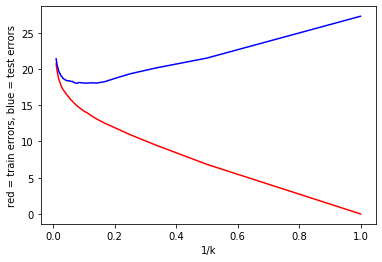

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 25 18:07:14 2020

@author: DHRUV
"""


# -*- coding: utf-8 -*-
"""
Created on Fri Sep 25 15:06:48 2020

@author: DHRUV
"""


"""
HW_2

i
"""
"""
Assumption

Since what constitutes the training data and what constitutes the test data hasn't been
explicitly specified, we'll take 70% of our original dataset as training and the rest as test

We could use train_test_split to generate random such sets each program run-time, however
since that was already done in HW2 part (h), we'll just split the dataset from the top and keep
it same each program run-time. The top 70% will make for training and the bottom 30% for test

"""
"""
NORMALIZED FEATURES USED HERE

"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import t
from statsmodels.tools.eval_measures import mse
from sklearn.preprocessing import normalize

df = pd.read_csv('Power_Plant.csv')
print(df)
train_i = df[0:6698]
print(train_i)
test_i = df[6698:9568]
print(test_i)
test_i.reset_index(drop = True,inplace = True)
print(test_i)
X_train = train_i.drop(columns=['PE'])
X_test = test_i.drop(columns = ['PE'])
y_train = train_i['PE']
y_test = test_i['PE']

X_train_normalized = pd.DataFrame(normalize(X_train), columns = ['AT','V', 'AP', 'RH'])
X_test_normalized = pd.DataFrame(normalize(X_test), columns = ['AT','V', 'AP', 'RH'])

print('The training feature data normalized is : \n',X_train_normalized)
print('The test feature data normalized is : \n',X_test_normalized)
print('The y_train output is : \n',y_train)
print('The y_test output is : \n',y_test)

train_errors = np.zeros(100)
test_errors = np.zeros(100)

"""
The features and outputs again match (are corresponding)
"""

k = np.arange(1,101)
index = np.arange(0,100)
i=0

for i in index:
    
    neigh=KNeighborsRegressor(n_neighbors = k[i])
    neigh.fit(X_train_normalized,y_train)
    y_train_predicted = neigh.predict(X_train_normalized)
    y_test_predicted = neigh.predict(X_test_normalized)
    MSE_train = mean_squared_error(y_train,y_train_predicted)
    MSE_test = mean_squared_error(y_test,y_test_predicted)
    
    train_errors[i] = MSE_train
    test_errors[i] = MSE_test



train_errors_df = pd.DataFrame(data = train_errors, index = range(1,101), columns = ['train_errors'])
test_errors_df = pd.DataFrame(data = test_errors, index = range(1,101), columns = ['test_errors'])


print(train_errors)
print(test_errors)

print(train_errors_df)
print(test_errors_df)


train_errors_min = np.amin(train_errors)
train_errors_min_index = np.argmin(train_errors)

test_errors_min = np.amin(test_errors)
test_errors_min_index = np.argmin(test_errors)

print('The minimum train error obtained is : \n', train_errors_min)
print('The k value that minimizes the train error is : \n', train_errors_min_index + 1)
print('The minimum test error obtained is : \n',test_errors_min)
print('The k value that minimizes the test error is : \n', test_errors_min_index + 1)


"""

Comments

Minimum train error for k=1 is obviously 0
if we need minimum train error for k > 1, we get it at k = 2 as 6.8395

Minimum test error is obtained for k=13 as 18.00688 for which train error is 14.95


Thus, 

Minimum Train Error = 0                   for   k = 1       (Trivial)
Minimum Train Error = 6.8395              for  k > 1, k = 2  

Minimum Test Error = 18.00688                for   k = 13
Train Error = 14.95                       for   k = 13


Optimal k (Minimizing Test Error) = k* = 13
Train Error = 14.95 for k = k*
Test Error = 18.00688 for k = k*


Thus k = k* = 13 is the best fit point

Looking at the test error vector we have for k = 7
Test Error = 18.05476
Training Error = 13.0644

Thus k = 7 can also be chosen as an optimal. Similarly even k = 6 can be chosen to be 
an optimal point. The differences in test errors aren't much, but there is the added benefit
of having to obtain fewer neighbors.

Thus k* = 13 (absolute optimal, minimal test error)

However k* = 7 or k* = 6 are also good enough optimals which save computation time


Additionally, note the overall errors post normalizations have slightly increased as compared
to the raw data set. This is obviously balanced by the many computational advantages offered
by a normalized data set. Here normalization has been done for a feature vector.

"""

"""
Plots
"""
k = k.astype('float64')

plt.plot(np.reciprocal(k),train_errors,'r',markersize = 5)
plt.plot(np.reciprocal(k),test_errors,'b',markersize = 5)
plt.xlabel('1/k')
plt.ylabel('red = train errors, blue = test errors')
plt.show()






